# Import Libraries

In [1]:
pip list

Package           Version
----------------- ---------
asttokens         2.0.5
backcall          0.2.0
click             8.1.2
cycler            0.11.0
debugpy           1.6.0
decorator         5.1.1
entrypoints       0.4
executing         0.8.3
fonttools         4.32.0
ipykernel         6.13.0
ipython           8.2.0
jedi              0.18.1
joblib            1.1.0
jupyter-client    7.2.2
jupyter-core      4.9.2
kiwisolver        1.4.2
matplotlib        3.5.1
matplotlib-inline 0.1.3
nest-asyncio      1.5.5
nltk              3.7
numpy             1.22.3
packaging         21.3
pandas            1.4.2
parso             0.8.3
pexpect           4.8.0
pickleshare       0.7.5
Pillow            9.1.0
pip               22.0.4
prompt-toolkit    3.0.29
psutil            5.9.0
ptyprocess        0.7.0
pure-eval         0.2.2
Pygments          2.11.2
pyparsing         3.0.8
python-dateutil   2.8.2
pytz              2022.1
pyzmq             22.3.0
regex             2022.3.15
scikit-learn      1.0.2
s

In [36]:
import nltk
import pandas as pd
from sklearn import preprocessing,metrics,manifold
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
# Data cleaning
import datacleaning as dc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# NOTE: Installed kernelspec venv in /home/kenny/.local/share/jupyter/kernels/venv
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import string
# import numpy as np

[nltk_data] Downloading package stopwords to /home/kenny/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kenny/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kenny/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Load Dataset

In [3]:
# Read csv
imdb_dataset = pd.read_csv('IMDB_Dataset.csv') ## Dataset Without cleaning
imdb_dataset.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Dataset info

In [4]:
imdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


We haven't found any rows with null values 

## Dataset summary

In [5]:
imdb_dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


# Number of positive and negative reviews

In [6]:
pos_reviews=imdb_dataset[imdb_dataset['sentiment']=='positive'][['review']]
print(f"First 7 samples of positive reviews: \n{pos_reviews.head(7)} \n")
neg_reviews=imdb_dataset[imdb_dataset['sentiment']=='negative'][['review']]
print(f"First 7 samples of negative reviews: \n{neg_reviews.head(7)}")

First 7 samples of positive reviews: 
                                              review
0  One of the other reviewers has mentioned that ...
1  A wonderful little production. <br /><br />The...
2  I thought this was a wonderful way to spend ti...
4  Petter Mattei's "Love in the Time of Money" is...
5  Probably my all-time favorite movie, a story o...
6  I sure would like to see a resurrection of a u...
9  If you like original gut wrenching laughter yo... 

First 7 samples of negative reviews: 
                                               review
3   Basically there's a family where a little boy ...
7   This show was an amazing, fresh & innovative i...
8   Encouraged by the positive comments about this...
10  Phil the Alien is one of those quirky films wh...
11  I saw this movie when I was about 12 when it c...
12  So im not a big fan of Boll's work but then ag...
13  The cast played Shakespeare.<br /><br />Shakes...


In [7]:
# Total count of positive and negative reviews:
print(f"Number of examples in the dataset: {len(imdb_dataset.index)}")
# https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
# len(df.index) is the fastest way to row count of a pandas dataframe
print(imdb_dataset['sentiment'].value_counts())

Number of examples in the dataset: 50000
positive    25000
negative    25000
Name: sentiment, dtype: int64


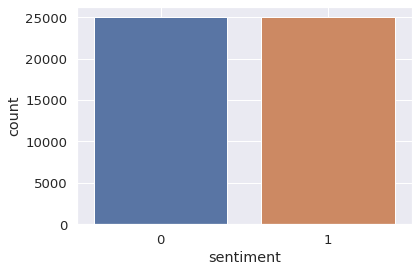

In [31]:
sns.set(style = "dark" , font_scale = 1.2)
sns.countplot(x=imdb_dataset['sentiment'])
plt.grid()

# Most used words for each type of sentiment

In [32]:
def generateWordCloud(data,title="",):
    wc = WordCloud(width = 1600, height = 800, 
                background_color ='black', 
                stopwords = set(STOPWORDS), 
                max_words=2000,
                min_font_size = 10).generate(' '.join(data)) 

    plt.figure(figsize=(8,8))
    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')

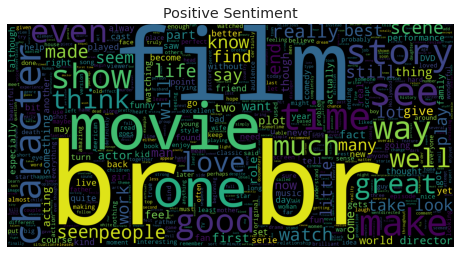

In [33]:
# Wordcloud for positive reviews
generateWordCloud(pos_reviews['review'],'Positive Sentiment')

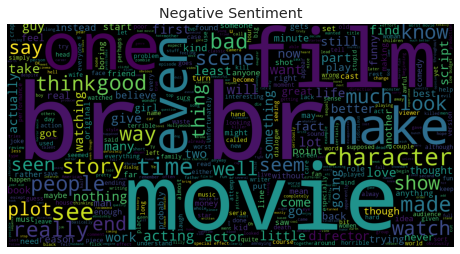

In [34]:
# Wordcloud for negative reviews
generateWordCloud(neg_reviews['review'],'Negative Sentiment')

##  Number of words in each text


Positive Review Words: 
0        307
1        162
2        166
4        230
5        119
        ... 
49983    133
49985    216
49989    173
49992    170
49995    194
Name: review, Length: 25000, dtype: int64 

Negative Review Words: 
3        138
7        174
8        130
10        96
11       180
        ... 
49994    134
49996    112
49997    230
49998    212
49999    129
Name: review, Length: 25000, dtype: int64


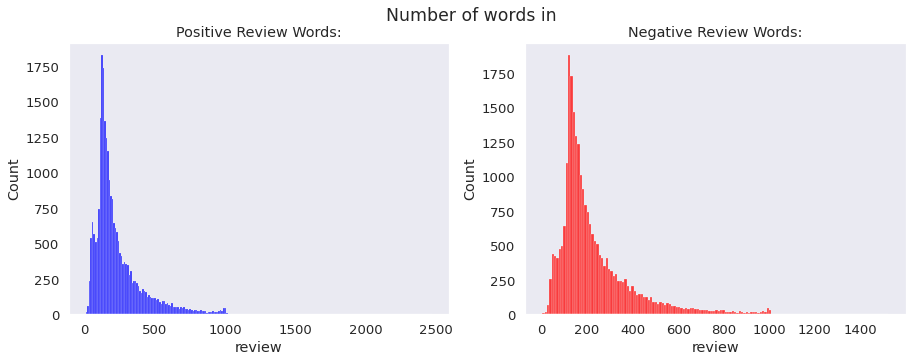

In [52]:
count_pos_words=pos_reviews['review'].str.split().apply(lambda x: len(x))
count_neg_words=neg_reviews['review'].str.split().apply(lambda x: len(x))

print(f"Positive Review Words: \n{count_pos_words} \n")
print(f"Negative Review Words: \n{count_neg_words}")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(count_pos_words,color='blue')
plt.title("Positive Review Words:")
plt.subplot(1, 2, 2)
sns.histplot(count_neg_words,color='red')
plt.title("Negative Review Words:")
plt.suptitle("Number of words in ")
plt.show()


## Data cleaning

In [12]:
# We create a function in python that clean each row of dataset
imdb_dataset['review']=imdb_dataset['review'].apply(lambda s: dc.clean_sentences(s))

In [13]:
imdb_dataset.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production . The filming t...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there is a family where a little boy...,negative
4,"Petter Mattei ' s "" Love in the Time of Money...",positive


In [14]:
imdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [15]:
# Generate a dataset with clean dataset
# path="dataset_limpio.csv"
# imdb_dataset.to_csv(path,index=False)

## Label Encoding

In [16]:
lencoder=LabelEncoder()
imdb_dataset['sentiment']=lencoder.fit_transform(imdb_dataset['sentiment'])
imdb_dataset.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production . The filming t...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there is a family where a little boy...,0
4,"Petter Mattei ' s "" Love in the Time of Money...",1


## Text Stemming

In [21]:
def stemmer(text):
    p=nltk.porter.PorterStemmer()
    txt= ' '.join([p.stem(word) for word in text.split()])
    return txt

def lemmatizer(text):
    lem=nltk.stem.WordNetLemmatizer()
    txt= ' '.join([lem.lemmatize(word) for word in text.split()])
    return txt

#After testing, the best way is to use lemmatization
imdb_dataset['review']= imdb_dataset['review'].apply(lemmatizer)    

In [23]:
imdb_dataset.head()

,review,sentiment
0,One of the other reviewer ha mentioned that af...,1
1,A wonderful little production . The filming te...,1
2,I thought this wa a wonderful way to spend tim...,1
3,Basically there is a family where a little boy...,0
4,"Petter Mattei ' s "" Love in the Time of Money ...",1


## Lower Case

In [24]:
imdb_dataset['review']=imdb_dataset['review'].apply(lambda x: x.lower())

## Clean whitespace 

In [25]:
imdb_dataset['review']=imdb_dataset['review'].apply(lambda x: x.strip())

## Removing stopwords

In [26]:
stopwords = stopwords.words('english')
for i in stopwords:
    imdb_dataset['review']= imdb_dataset['review'].replace(to_replace=r'\b%s\b'%i, value="",regex=True)
    
imdb_dataset.head(10)

,review,sentiment
0,one reviewer ha mentioned watching oz ep...,1
1,wonderful little production . filming techni...,1
2,thought wa wonderful way spend time hot...,1
3,basically family little boy ( jake ) thin...,0
4,"petter mattei ' "" love time money "" visu...",1
5,"probably - time favorite movie , story sel...",1
6,sure would like see resurrection dated s...,1
7,"show wa amazing , fresh & innovative idea ...",0
8,encouraged positive comment film wa loo...,0
9,like original gut wrenching laughter like ...,1


### Spliting the training dataset


In [27]:
y=imdb_dataset['sentiment']
X=imdb_dataset['review']
print(f"Reviews X: \n{X}\n")
print(f"Clasification y: \n{y}")

Reviews X: 
0        one    reviewer ha mentioned   watching  oz ep...
1         wonderful little production .  filming techni...
2         thought  wa  wonderful way  spend time    hot...
3        basically    family   little boy ( jake ) thin...
4        petter mattei '  " love   time  money "   visu...
                               ...                        
49995     thought  movie    right good job .  wa   crea...
49996    bad plot , bad dialogue , bad acting , idiotic...
49997       catholic taught  parochial elementary schoo...
49998     '  going    disagree   previous comment  side...
49999     one expects  star trek movie   high art ,   f...
Name: review, Length: 50000, dtype: object

Clasification y: 
0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
